In [1]:
from itertools import combinations, groupby

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial


from pymutspec.draw import plot_mutspec192, plot_mutspec12, sbs_orders

### Read file with calculated mutational spectrum from NeMu pipline

In [2]:
mutspecs = pd.read_csv('../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Gene == 'Cytb']
mutspecs = mutspecs.fillna(0)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec
39552,Cytb,Mammalia,Tarsius_dentatus,A[A>C]A,0.0,0.00,0.0
39553,Cytb,Mammalia,Tarsius_dentatus,A[A>C]C,0.0,0.00,0.0
39554,Cytb,Mammalia,Tarsius_dentatus,A[A>C]G,0.0,0.00,0.0
39555,Cytb,Mammalia,Tarsius_dentatus,A[A>C]T,0.0,0.00,0.0
39556,Cytb,Mammalia,Tarsius_dentatus,C[A>C]A,0.0,11.95,0.0


In [3]:
# Function to translate mutspec from light to heavy chain
def getrevers(mut):
    translator = str.maketrans("ACGT", "TGCA")
    new_mut = mut[-1] + mut[1:-1] + mut[0]
    new_mut = new_mut.translate(translator)
    return new_mut

### Here we translate our mutspec with reverse on HEAVY CHAIN

In [4]:
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers)
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


In [16]:
### CONTROL CHECK 
### Check that mutspec df is on heavy chain
### Most common MutBase is C>T, so it's heavy chain
mutspecs.groupby(['MutBase']).MutSpec.mean().reset_index().sort_values(by='MutSpec', ascending=False)

,MutBase,MutSpec
5,C>T,0.026464
1,A>G,0.014408
6,G>A,0.008056
10,T>C,0.006777
8,G>T,0.001540
4,C>G,0.001402
2,A>T,0.000819
3,C>A,0.000816
9,T>A,0.000688
11,T>G,0.000539


## Function to draw MutSpec

### Plot Mutational Spectrum for all Vertebrates for Cytb

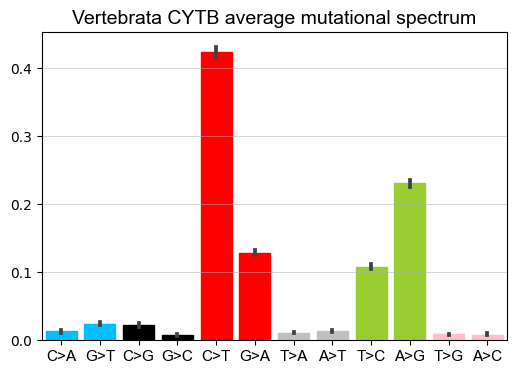

In [17]:
_species_spectra12 = mutspecs.copy()
_species_spectra12["Mut"] = _species_spectra12["Mut"].str.slice(2,5)
ax = plot_mutspec12(
    _species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
    fontname="Arial", ticksize=11, title="Vertebrata CYTB average mutational spectrum",
    savepath="figures/Mut12Vert.pdf")

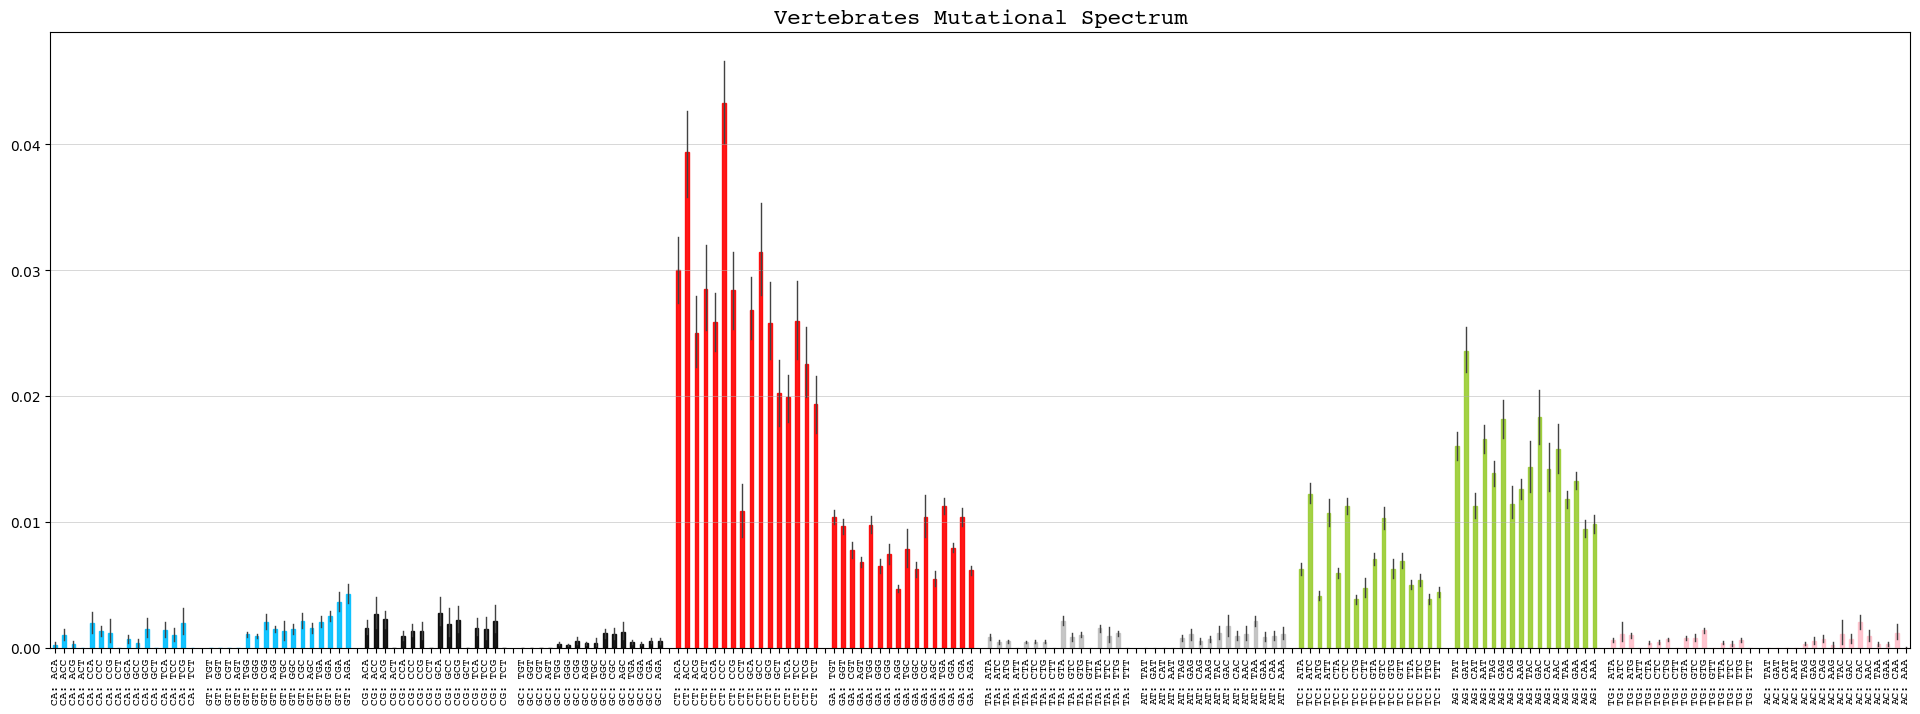

<AxesSubplot:title={'center':'Vertebrates Mutational Spectrum'}>

In [18]:
plot_mutspec192(mutspecs, title='Vertebrates Mutational Spectrum', savepath='figures/MutSpec192Vert_longformat.pdf',
                fontname='Courier', ticksize=8, labels_style='long')

### Draw MutSpec for Ch>Th and Ah>Gh for all vertebrates separately 

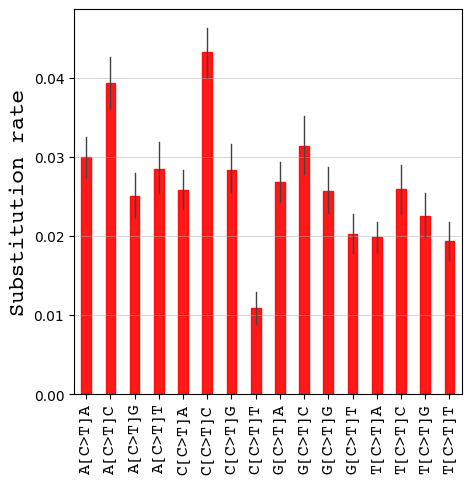

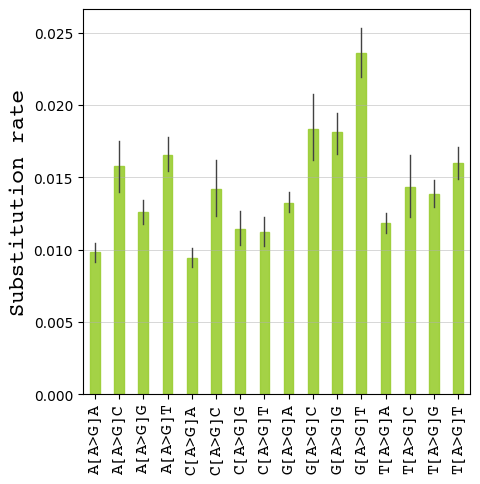

<AxesSubplot:ylabel='Substitution rate'>

In [19]:
from pymutspec.draw.sbs_orders import ordered_sbs192_kp


plot_mutspec192(mutspecs, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5), savepath="figures/VertChTh.pdf")
plot_mutspec192(mutspecs, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5), savepath="figures/VertAhGh.pdf")

### Draw Mutational Spectra for different classes

In [36]:
taxes_to_draw = ['Mammalia', 'Aves', 'Actinopteri', 'Lepidosauria', 'Amphibia']

savepath = ./figures/MSClasses/MammaliaMut192Comp.pdf


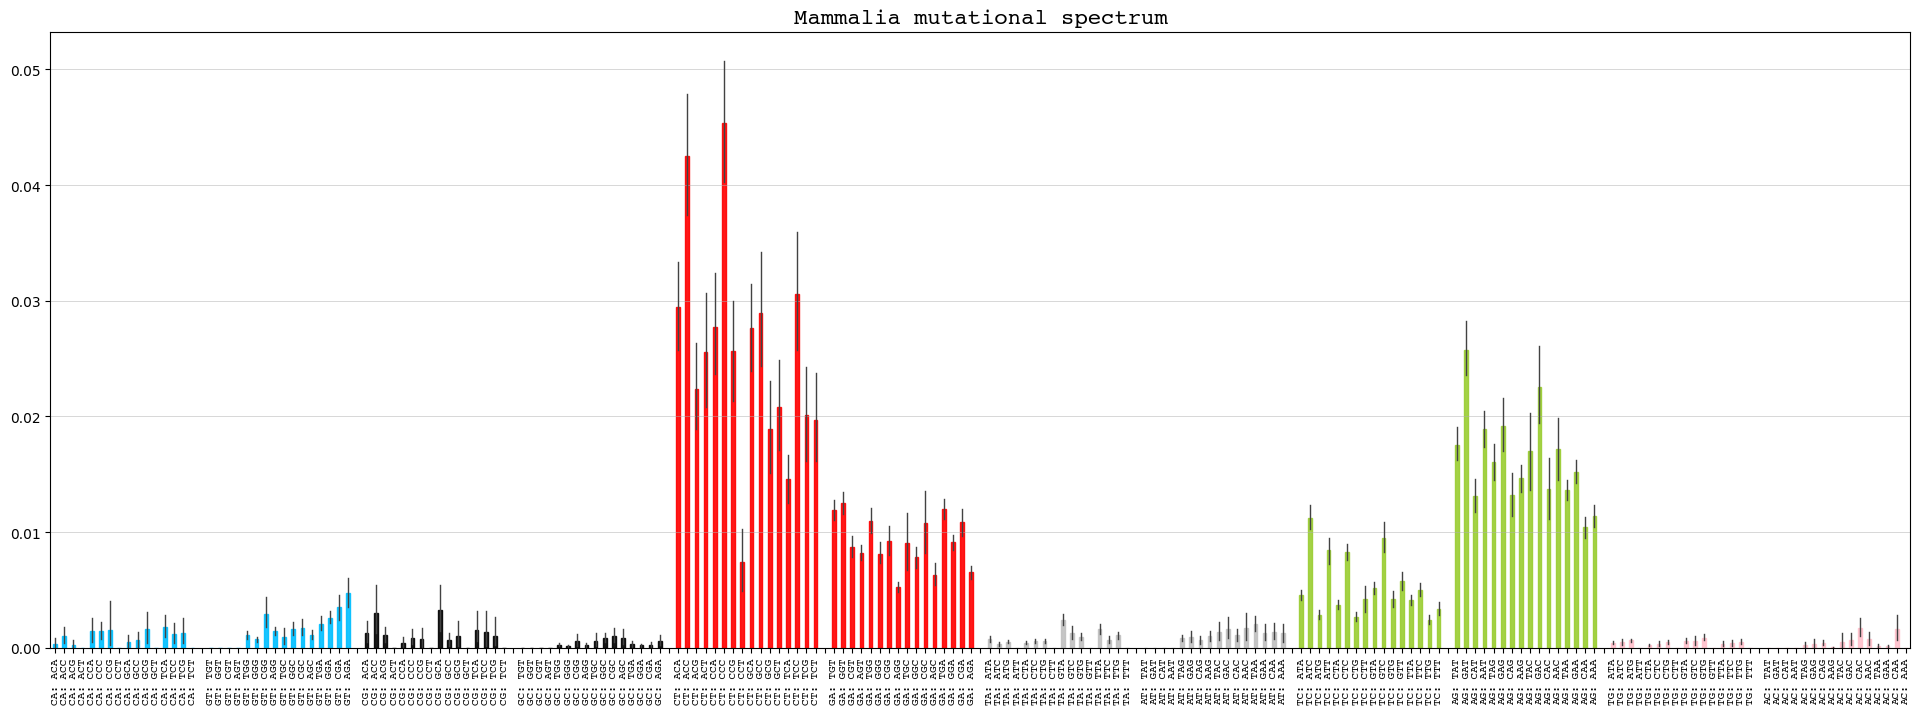

savepath = ./figures/MSClasses/AvesMut192Comp.pdf


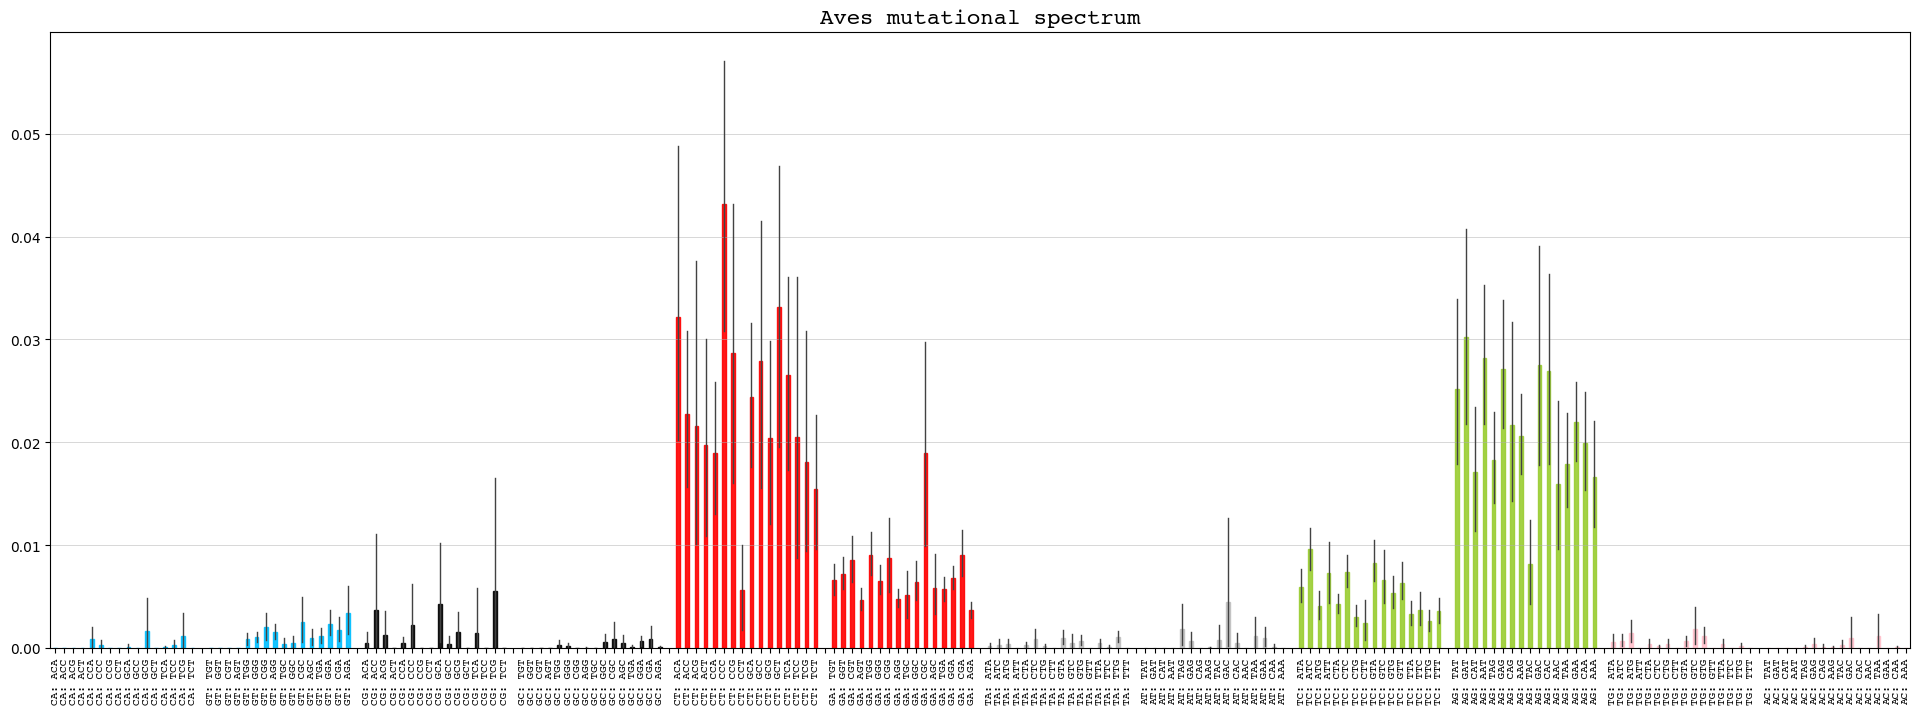

savepath = ./figures/MSClasses/ActinopteriMut192Comp.pdf


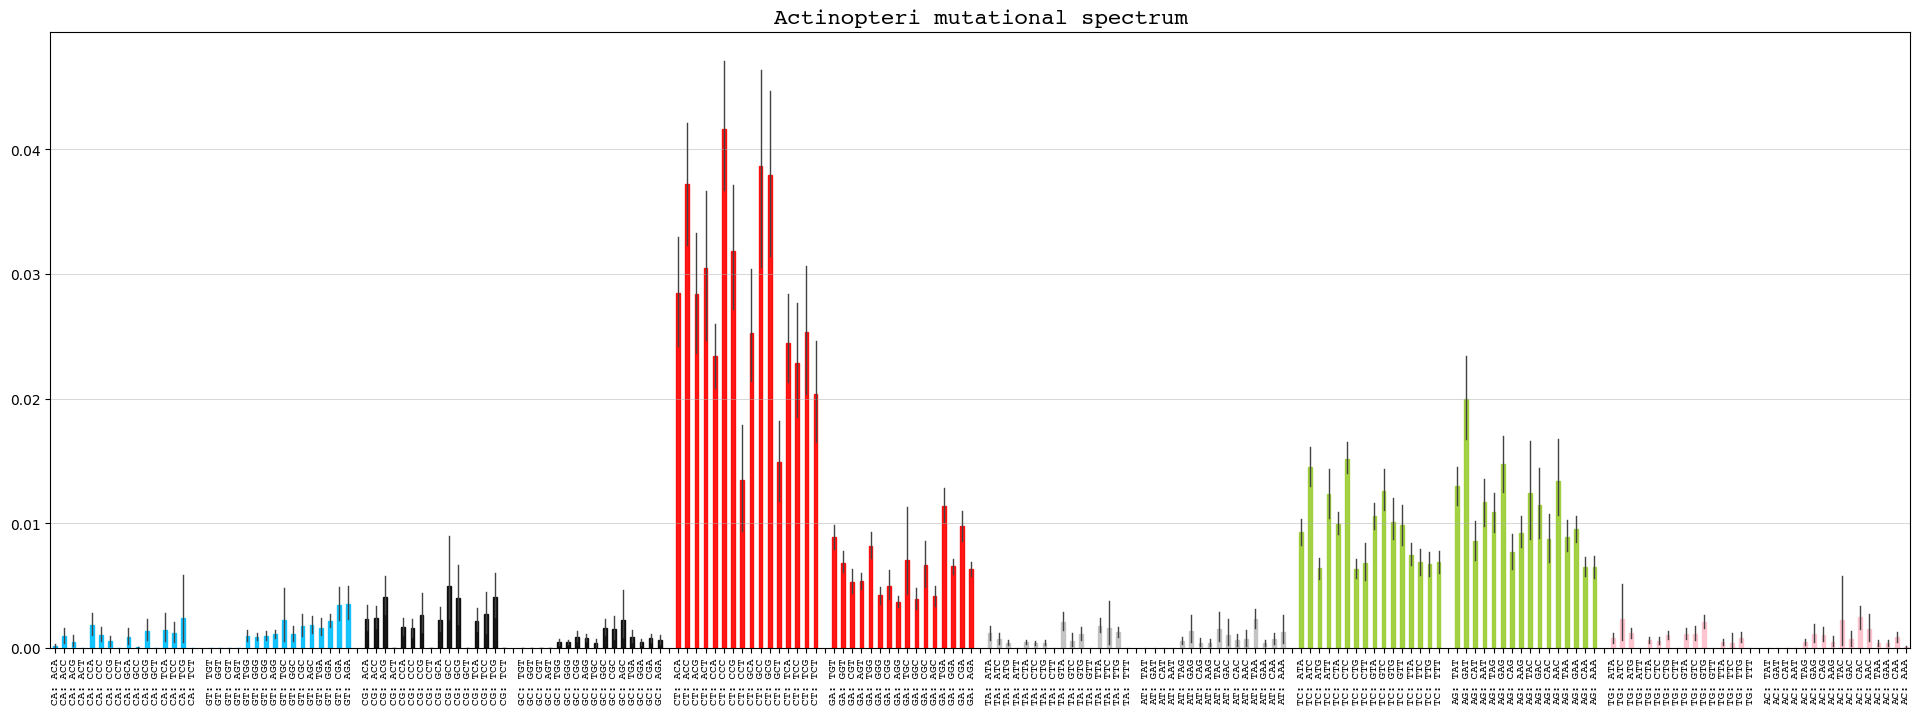

savepath = ./figures/MSClasses/LepidosauriaMut192Comp.pdf


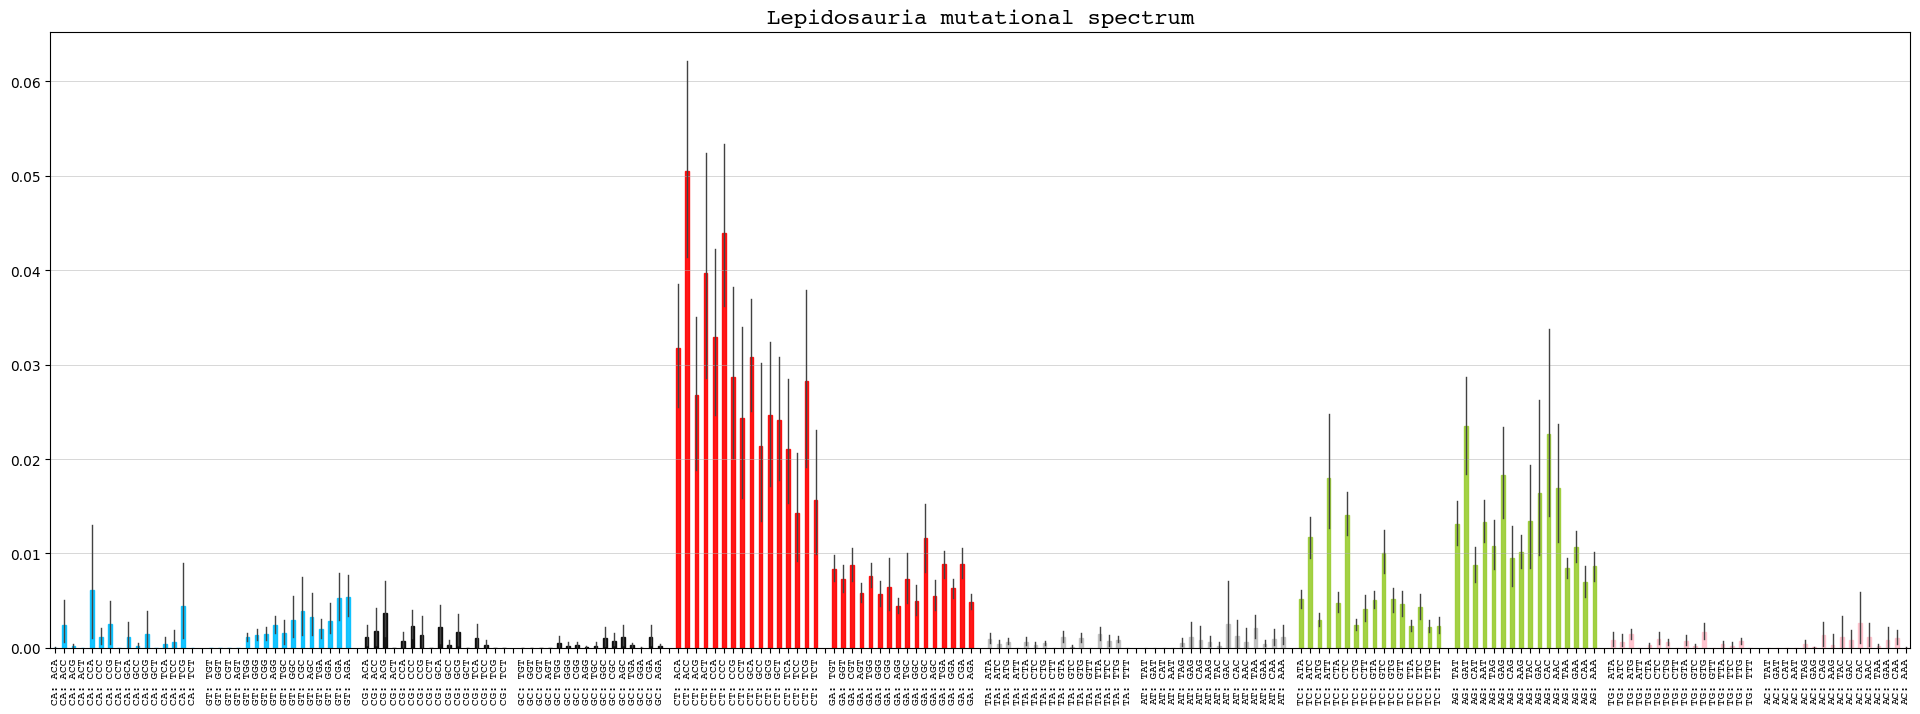

savepath = ./figures/MSClasses/AmphibiaMut192Comp.pdf


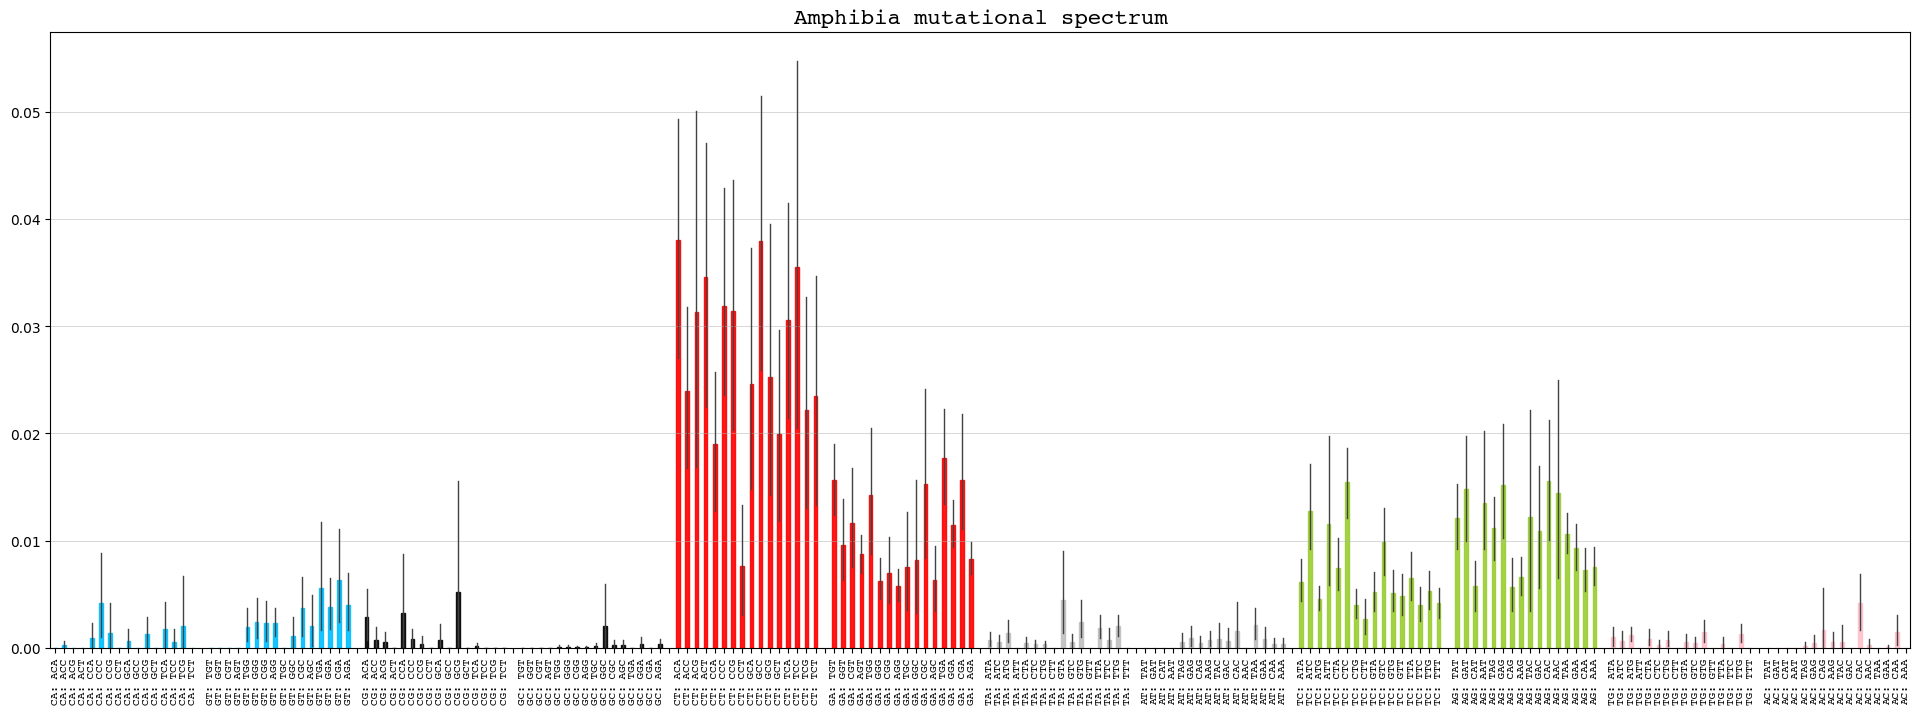

In [37]:
for tax in taxes_to_draw:
    plot_mutspec192(mutspecs[mutspecs['Class'] == tax], title=f'{tax} mutational spectrum',
    filepath=f'./figures/MSClasses/{tax}Mut192Comp.pdf', fontname='Courier', ticksize=8, labels_style='long')

### Analysis of C>T on heavy chain as a hallmark of oxidative damage

In [61]:
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
60288,Cytb,Aves,Aulacorhynchus_haematopygus,T[T>G]T,0.0,0.0,0.0,T>G,TTT
60289,Cytb,Aves,Aulacorhynchus_haematopygus,G[T>G]T,0.0,0.0,0.0,T>G,GTT
60290,Cytb,Aves,Aulacorhynchus_haematopygus,C[T>G]T,0.0,0.0,0.0,T>G,CTT
60291,Cytb,Aves,Aulacorhynchus_haematopygus,A[T>G]T,0.0,0.0,0.0,T>G,ATT
60292,Cytb,Aves,Aulacorhynchus_haematopygus,T[T>G]G,0.0,9.0,0.0,T>G,TTG


In [62]:
CT_only = mutspecs[mutspecs['MutBase'] == 'C>T']
C_T_arr = ["A[C>T]A", "A[C>T]C", "A[C>T]G", "A[C>T]T", "C[C>T]A", "C[C>T]C", "C[C>T]G", "C[C>T]T", 
    "G[C>T]A", "G[C>T]C", "G[C>T]G", "G[C>T]T", "T[C>T]A", "T[C>T]C", "T[C>T]G", "T[C>T]T"]

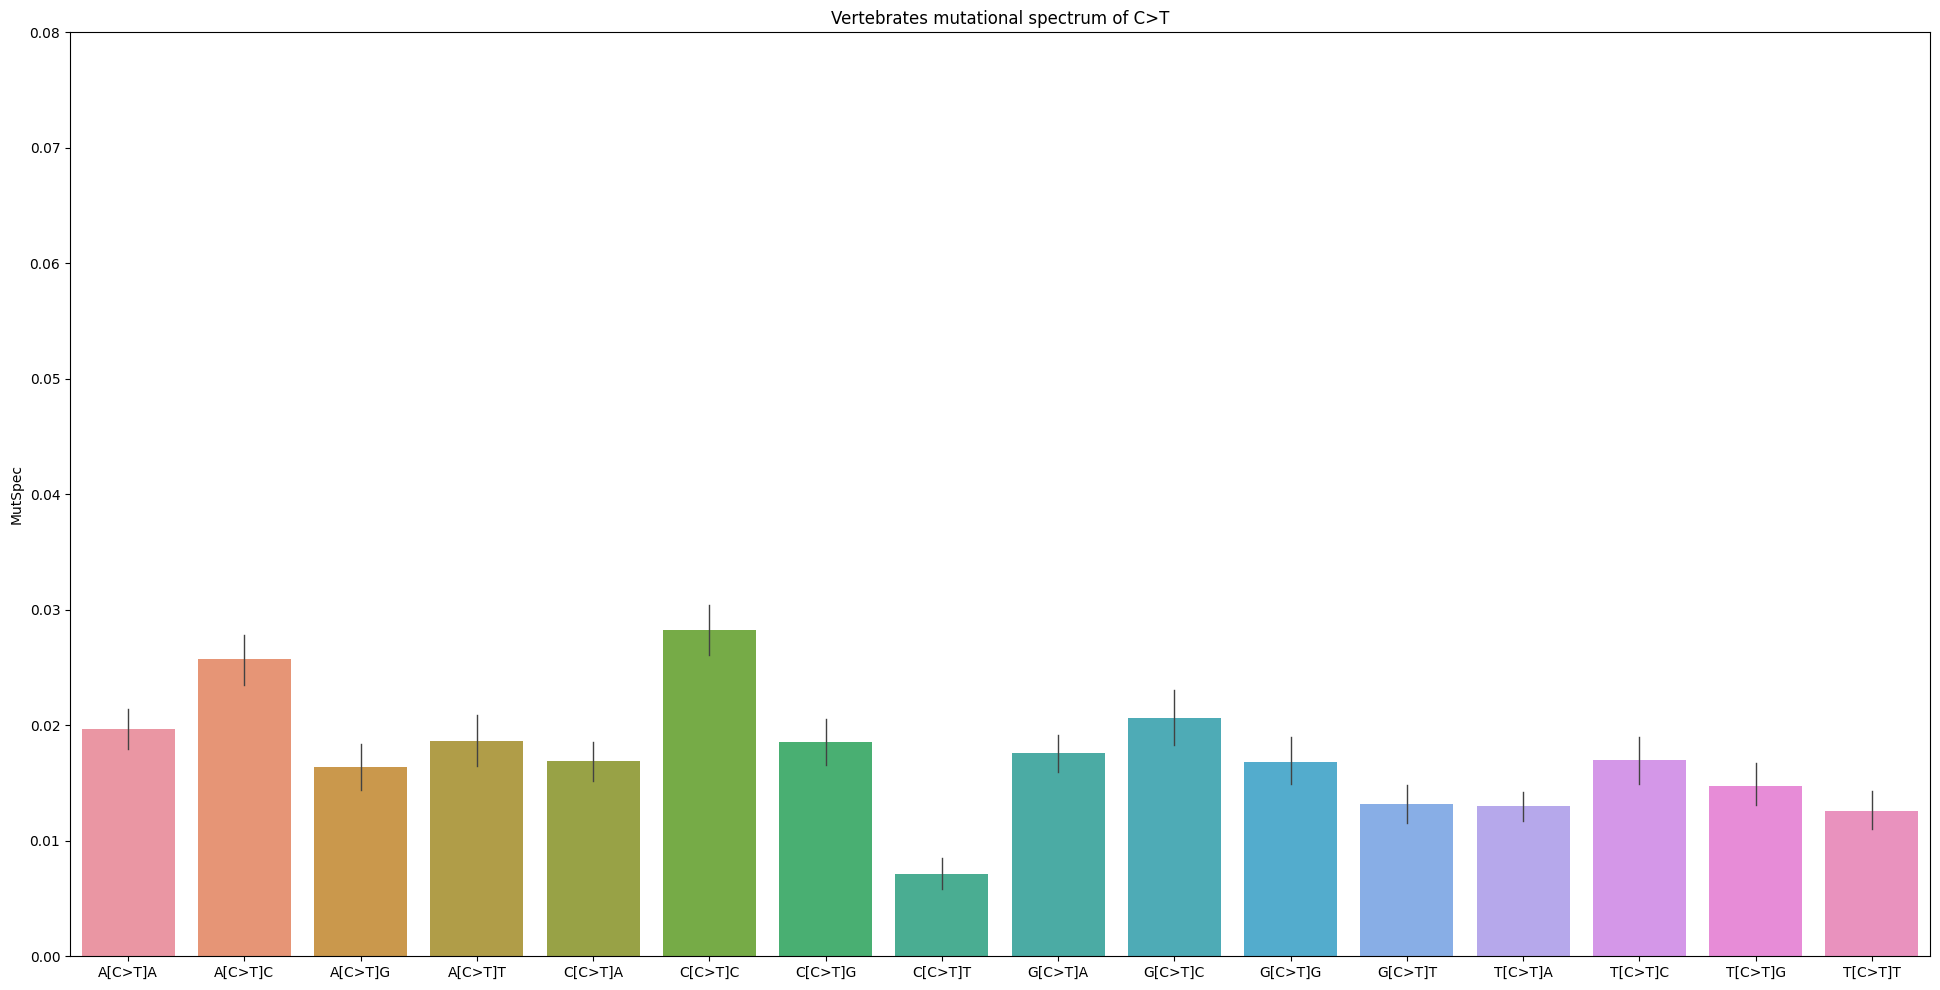

In [63]:
### All vertebrates
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=CT_only,
            order=C_T_arr, errwidth=1, ax=fig.gca())
ax.set_xlabel('')
ax.set_title('Vertebrates mutational spectrum of C>T')
ax.set_ylim(0,0.08)
plt.savefig('../pictures/MutSpec/CTMutVert.pdf',dpi=300)


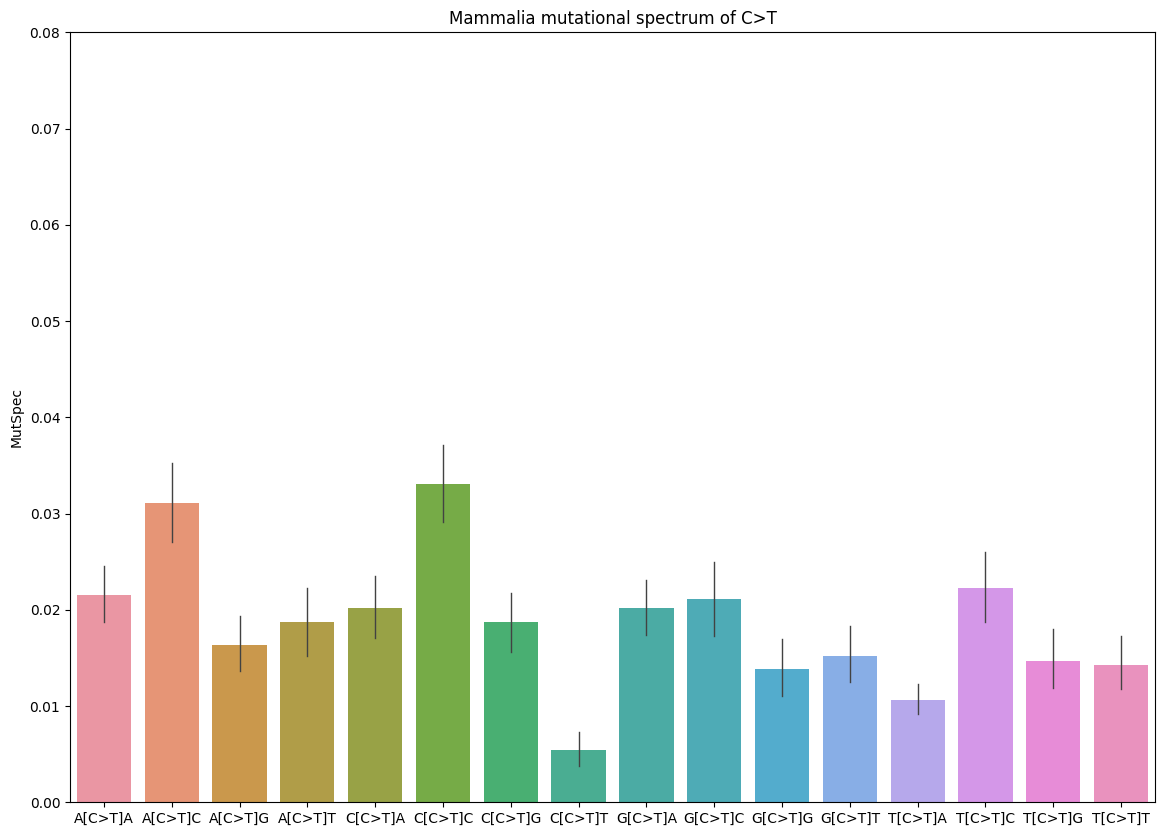

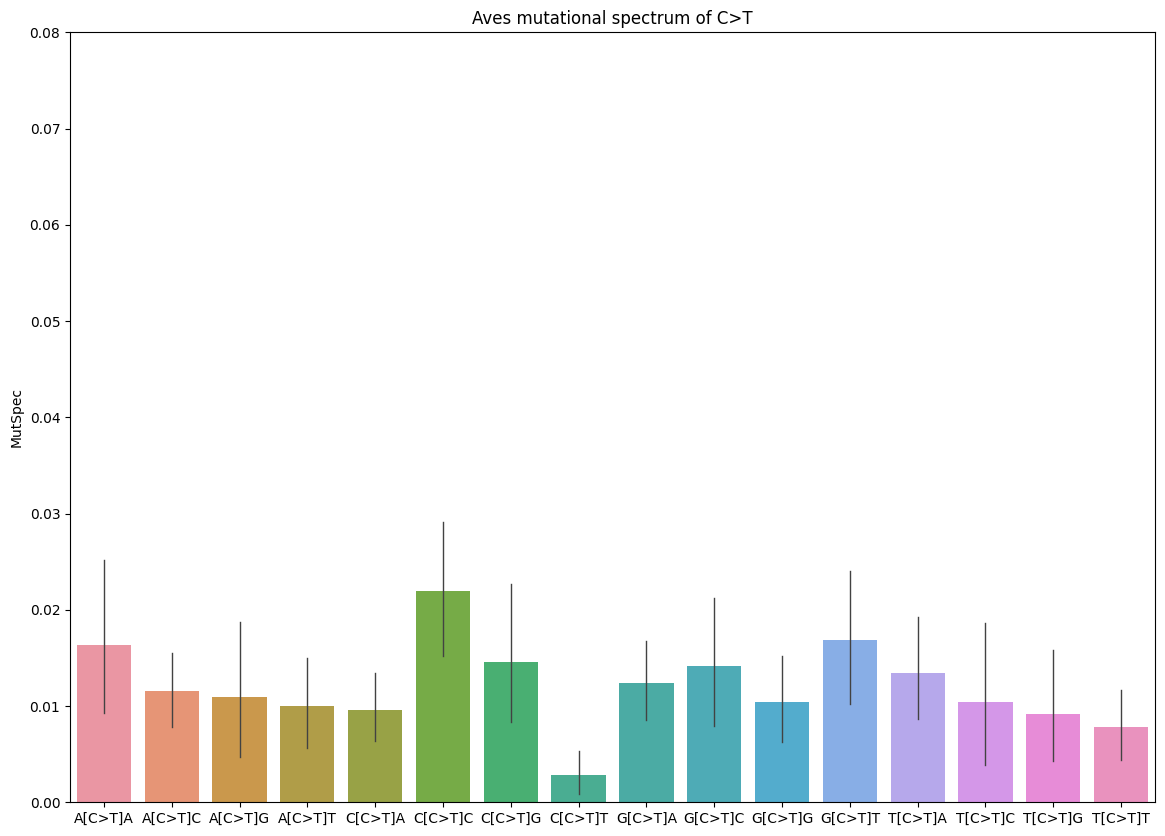

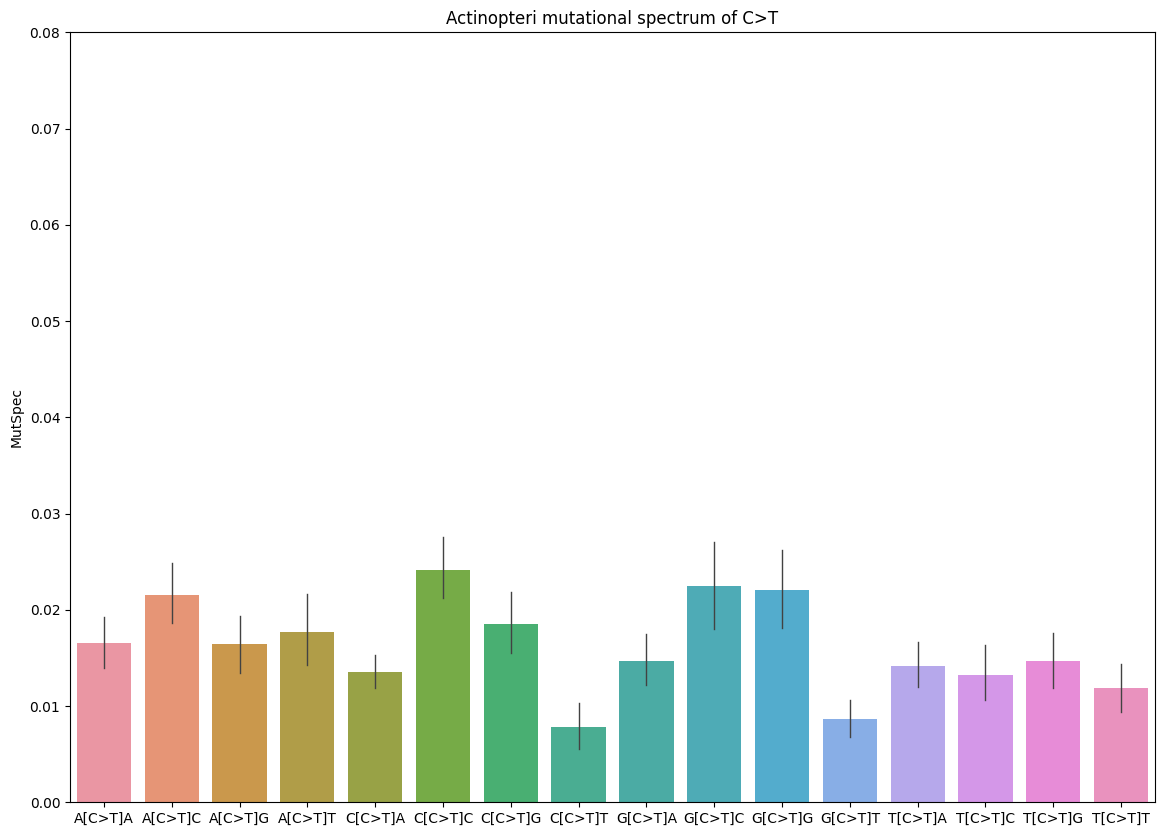

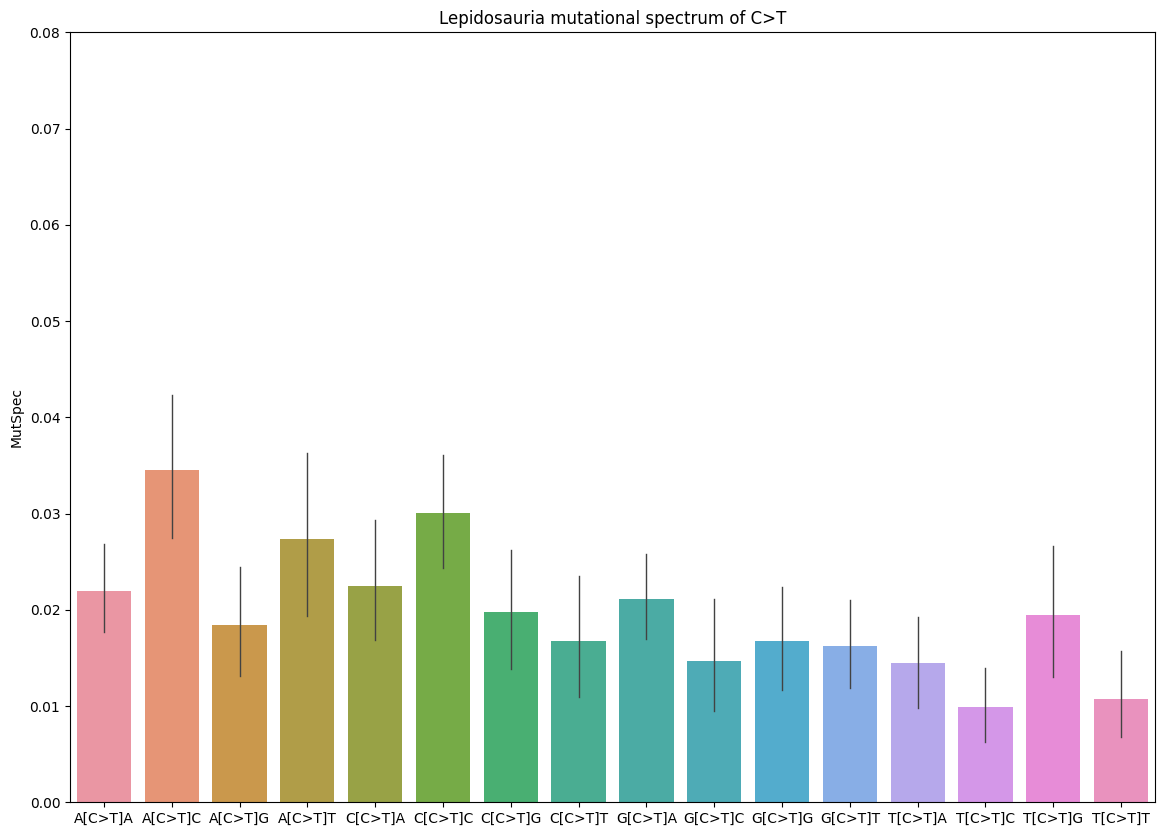

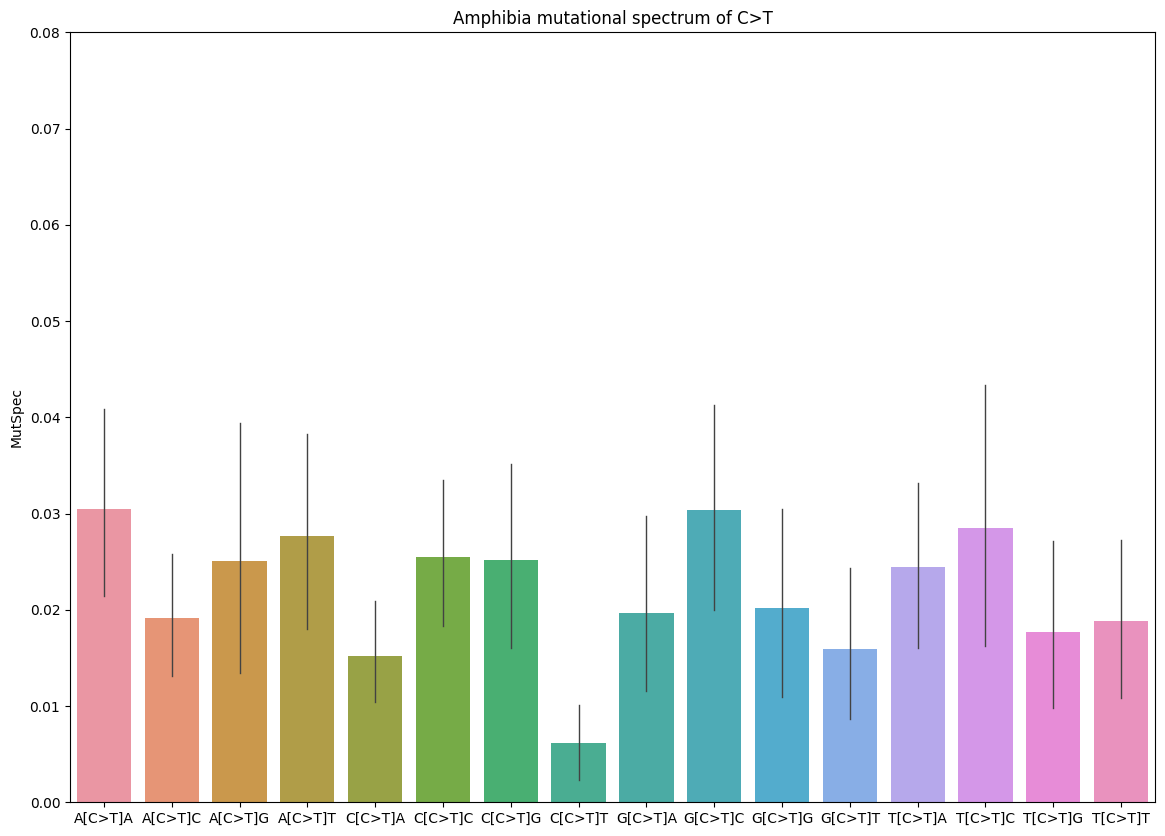

In [64]:
### Classes separately
for tx in taxes_to_draw:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)   
    sns.barplot(x="Mut", y="MutSpec", data=CT_only[CT_only.Class == tx],
                order=C_T_arr, errwidth=1, ax=fig.gca())
    ax.set_xlabel('')
    ax.set_title(f'{tx} mutational spectrum of C>T')
    ax.set_ylim(0, 0.08)


### Analysis of A>G on heavy chain as a hallmark of 6MA

In [34]:
AG_only = mutspecs[mutspecs['MutBase'] == 'A>G']
A_G_arr = ["A[A>G]A", "A[A>G]C", "A[A>G]G", "A[A>G]T", "C[A>G]A", "C[A>G]C", "C[A>G]G", "C[A>G]T", 
    "G[A>G]A", "G[A>G]C", "G[A>G]G", "G[A>G]T", "T[A>G]A", "T[A>G]C", "T[A>G]G", "T[A>G]T"]
colorsAG = ['orange','orange','orange','orange','green','green','green','green',
            'salmon','salmon','salmon','salmon','royalblue','royalblue','royalblue','royalblue']

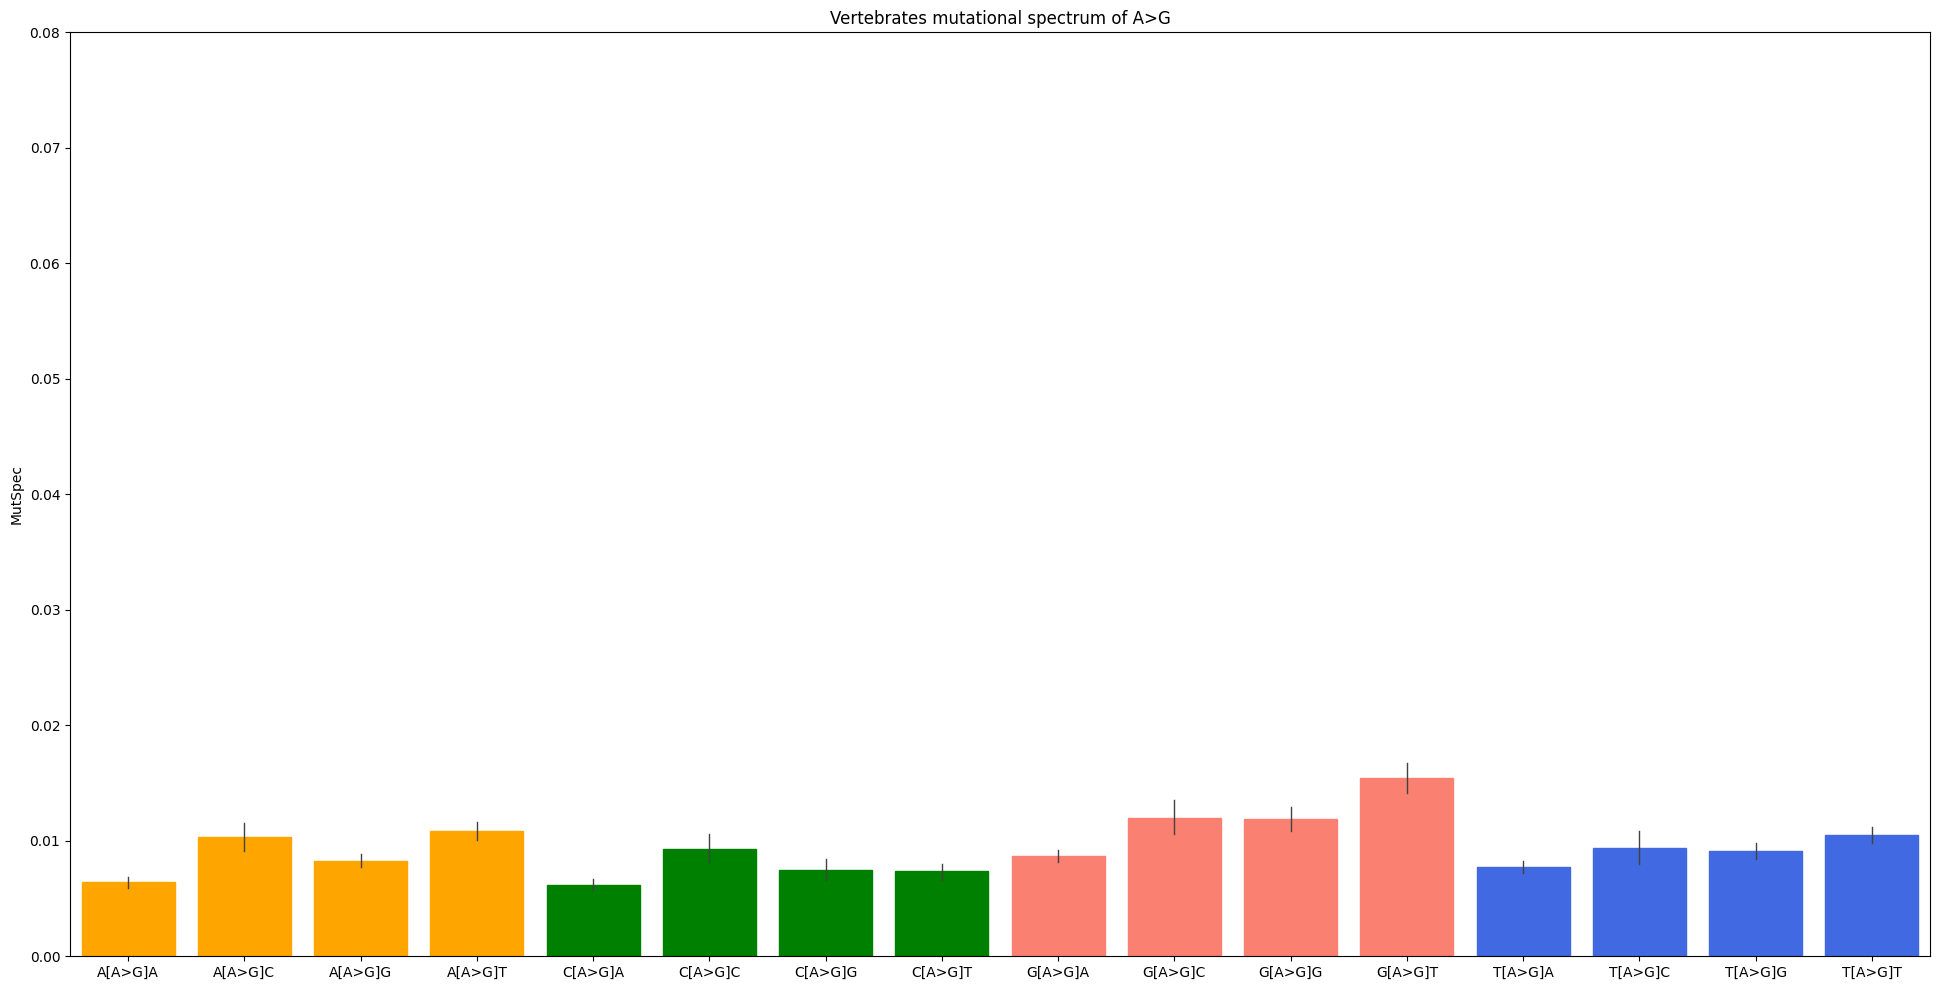

In [66]:
### All vertebrates
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=AG_only,
            order=A_G_arr, errwidth=1, ax=fig.gca())
for bar, clr in zip(ax.patches, colorsAG):
        bar.set_color(clr)
ax.set_xlabel('')
ax.set_title('Vertebrates mutational spectrum of A>G')
ax.set_ylim(0, 0.08)
plt.show()

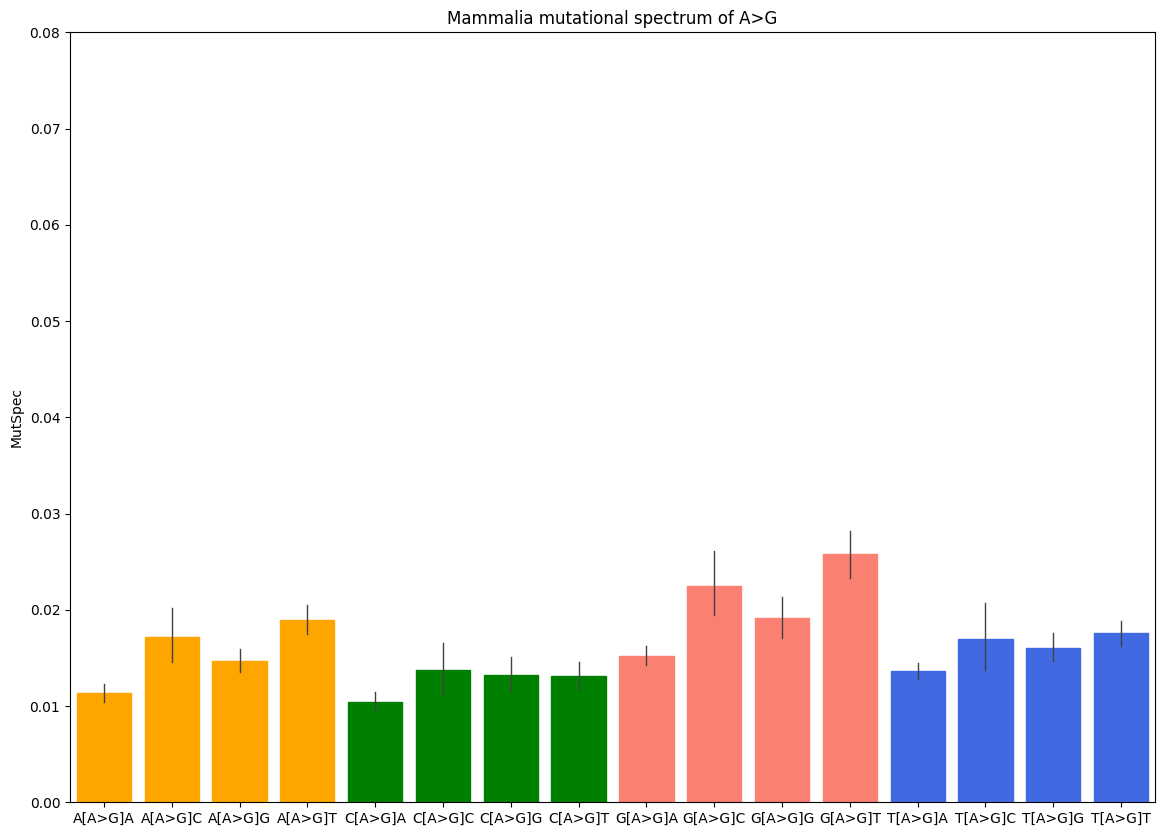

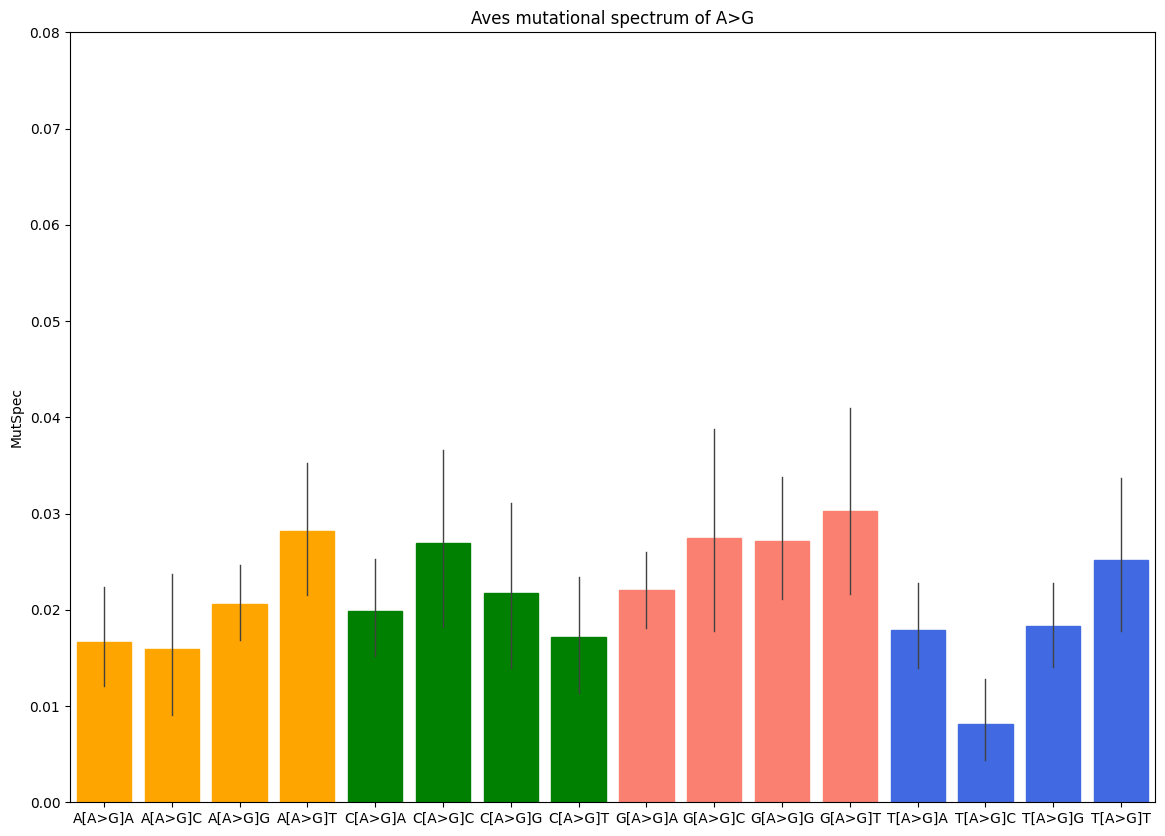

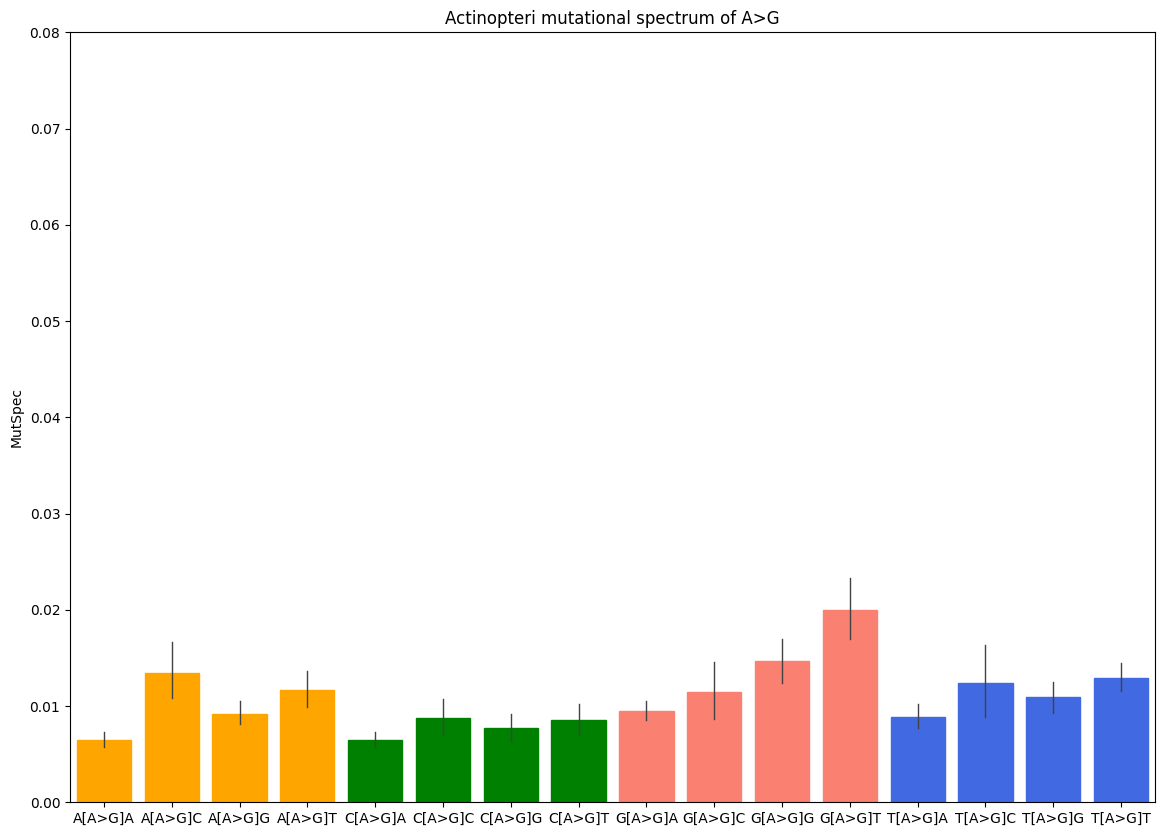

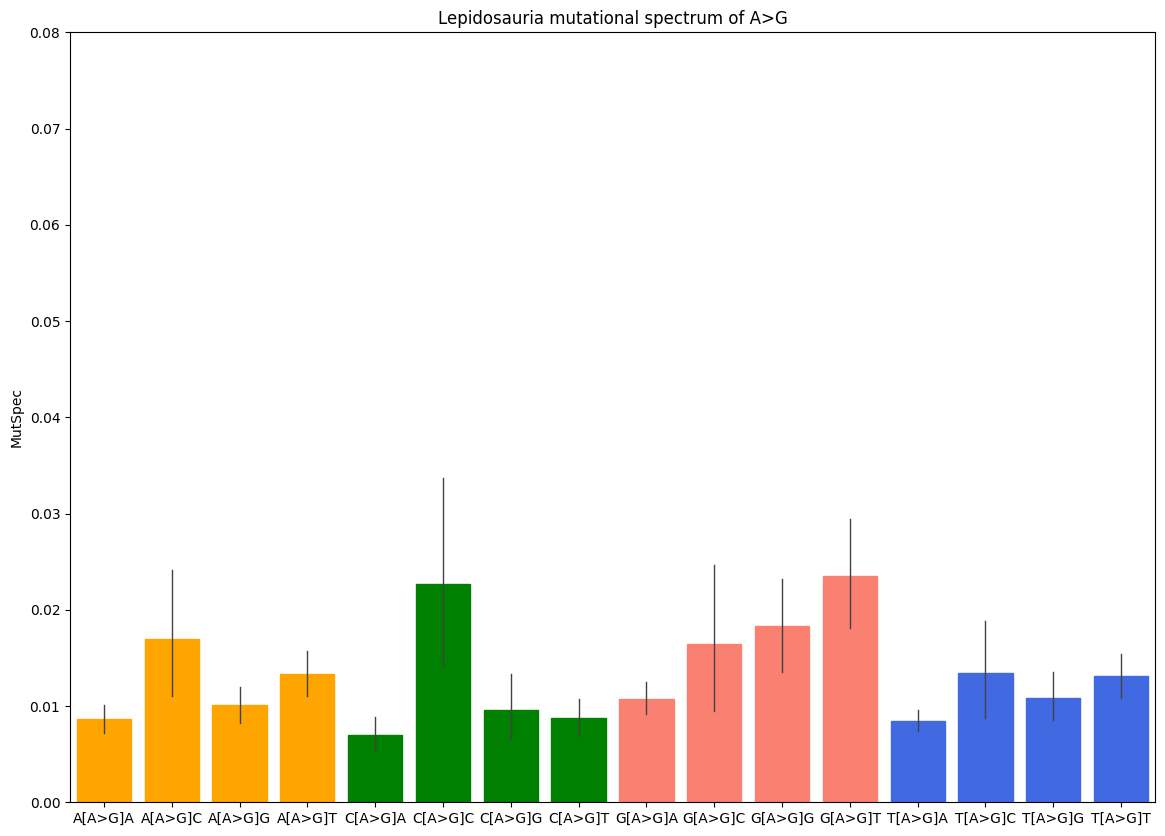

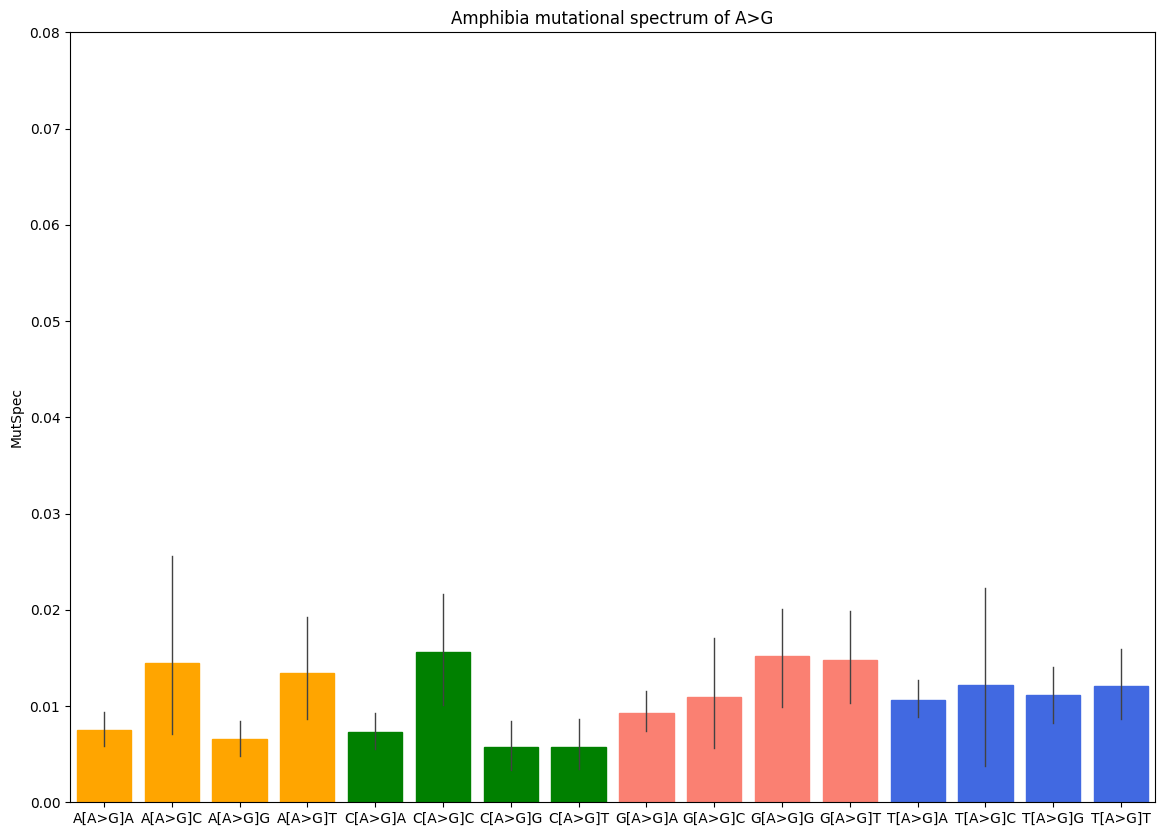

In [35]:
### Classes separately
for tx in taxes_to_draw:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)   
    sns.barplot(x="Mut", y="MutSpec", data=AG_only[AG_only.Class == tx],
                order=A_G_arr, errwidth=1, ax=fig.gca())
    for bar, clr in zip(ax.patches, colorsAG):
        bar.set_color(clr)
    ax.set_xlabel('')
    ax.set_title(f'{tx} mutational spectrum of A>G')
    ax.set_ylim(0, 0.08)

### Draw MutSpec for 3 left genes (CO1, CO3, ND2)

In [41]:
mutspecs_all = pd.read_csv('../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
mutspecs_all = mutspecs_all.fillna(0)
mutspecs_all['Mut'] = mutspecs_all.Mut.apply(getrevers) ### TRANSLATION TO HEAVY CHAIN
mutspecs_all["MutBase"] = mutspecs_all.Mut.str.slice(2, 5)
mutspecs_all["Context"] = mutspecs_all.Mut.str.get(0) + mutspecs_all.Mut.str.get(2) + mutspecs_all.Mut.str.get(-1)
mutspecs_all = mutspecs_all[mutspecs_all.Gene != 'Cytb']
mutspecs_all.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
0,CO1,Mammalia,Crocuta_crocuta,T[T>G]T,0.0,0.000000,0.0,T>G,TTT
1,CO1,Mammalia,Crocuta_crocuta,G[T>G]T,0.0,0.000000,0.0,T>G,GTT
2,CO1,Mammalia,Crocuta_crocuta,C[T>G]T,0.0,0.000000,0.0,T>G,CTT
3,CO1,Mammalia,Crocuta_crocuta,A[T>G]T,0.0,0.000000,0.0,T>G,ATT
4,CO1,Mammalia,Crocuta_crocuta,T[T>G]G,0.0,13.666667,0.0,T>G,TTG


### Draw gene-specific 12-comp mutational spectrum for all vertebrates

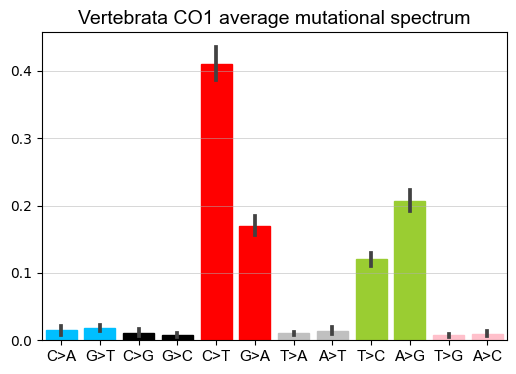

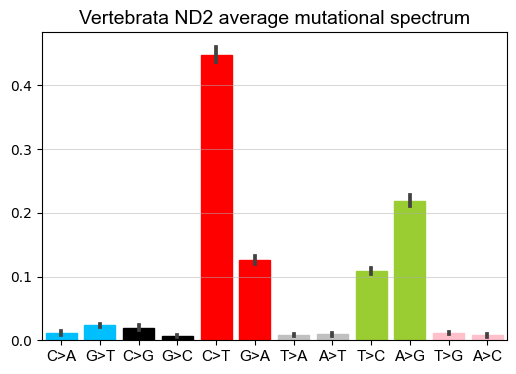

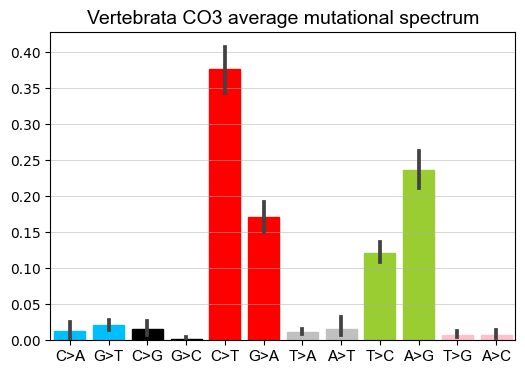

In [43]:
for gene in mutspecs_all.Gene.drop_duplicates():
    _gene_species_spectra12 = mutspecs_all[mutspecs_all.Gene == gene].copy()
    _gene_species_spectra12["Mut"] = _gene_species_spectra12["Mut"].str.slice(2,5)
    ax = plot_mutspec12(
        _gene_species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
        fontname="Arial", ticksize=11, title=f"Vertebrata {gene} average mutational spectrum")

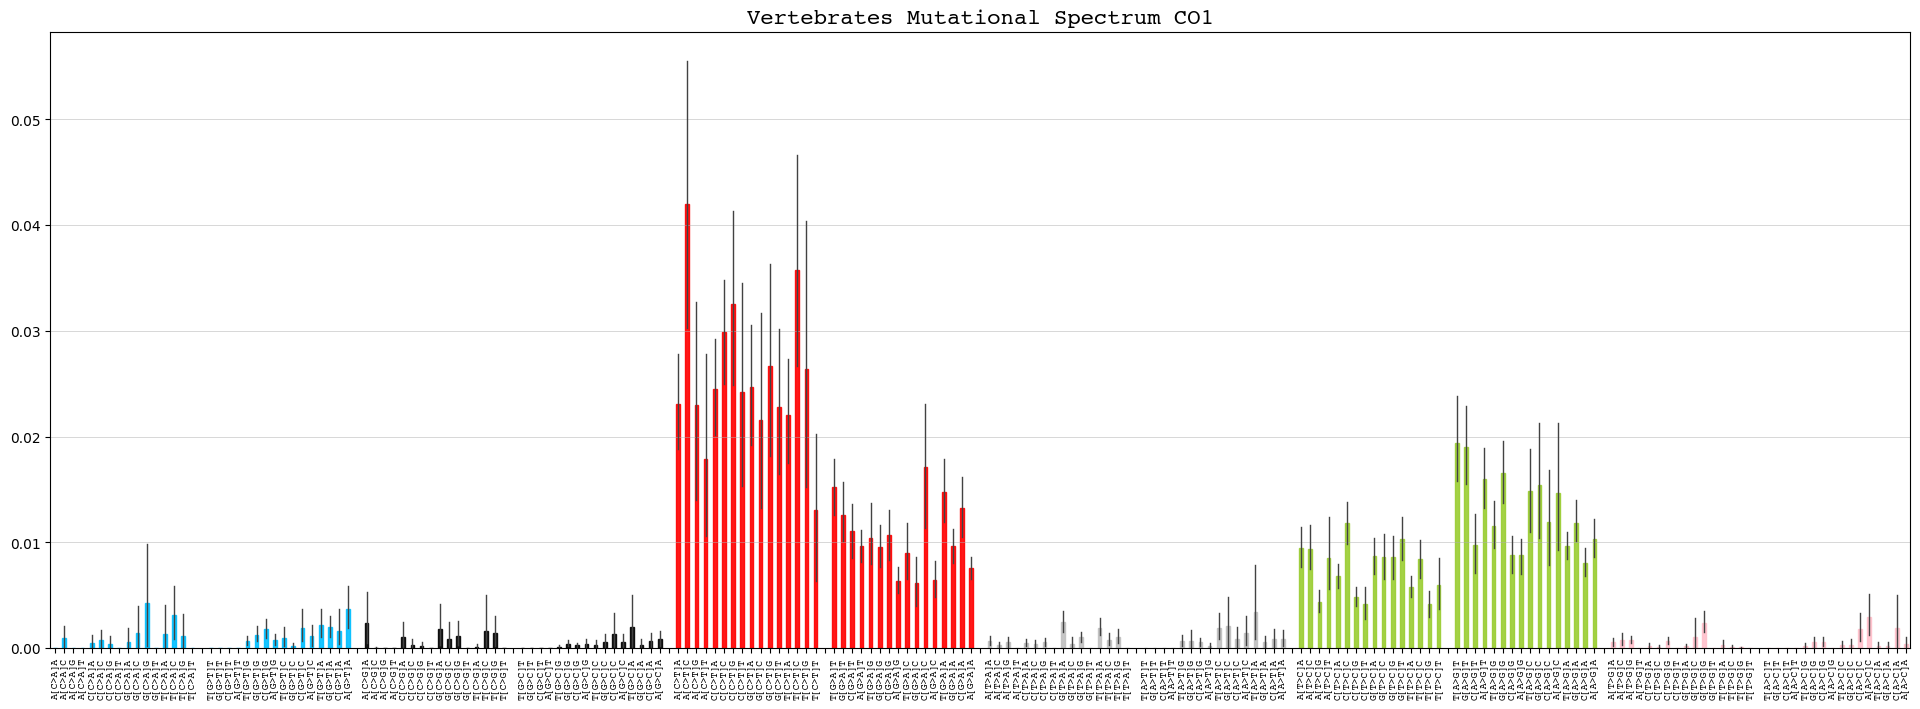

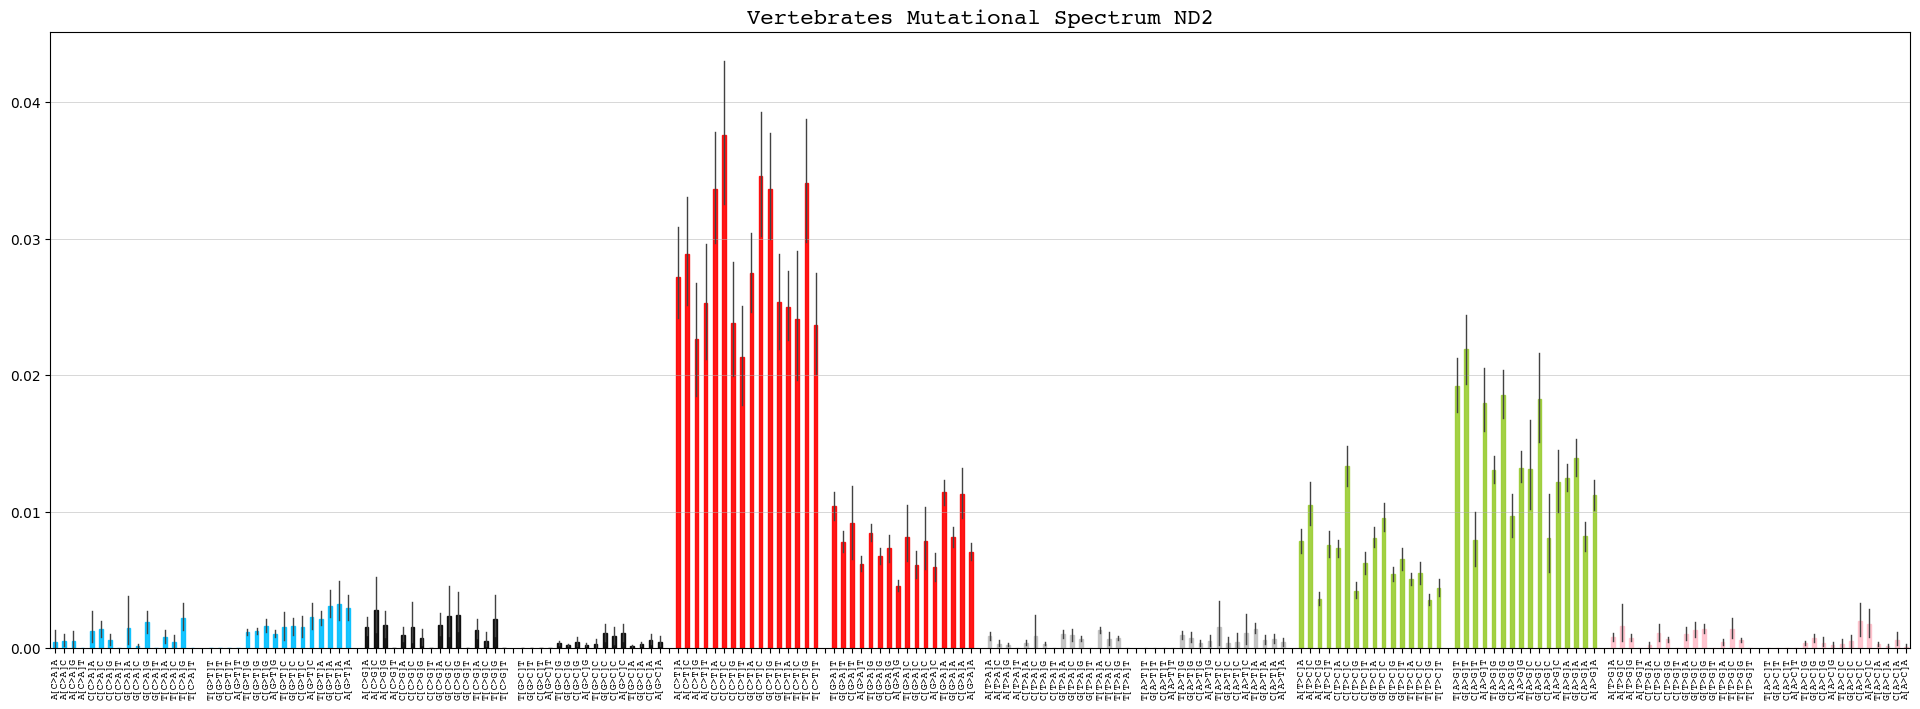

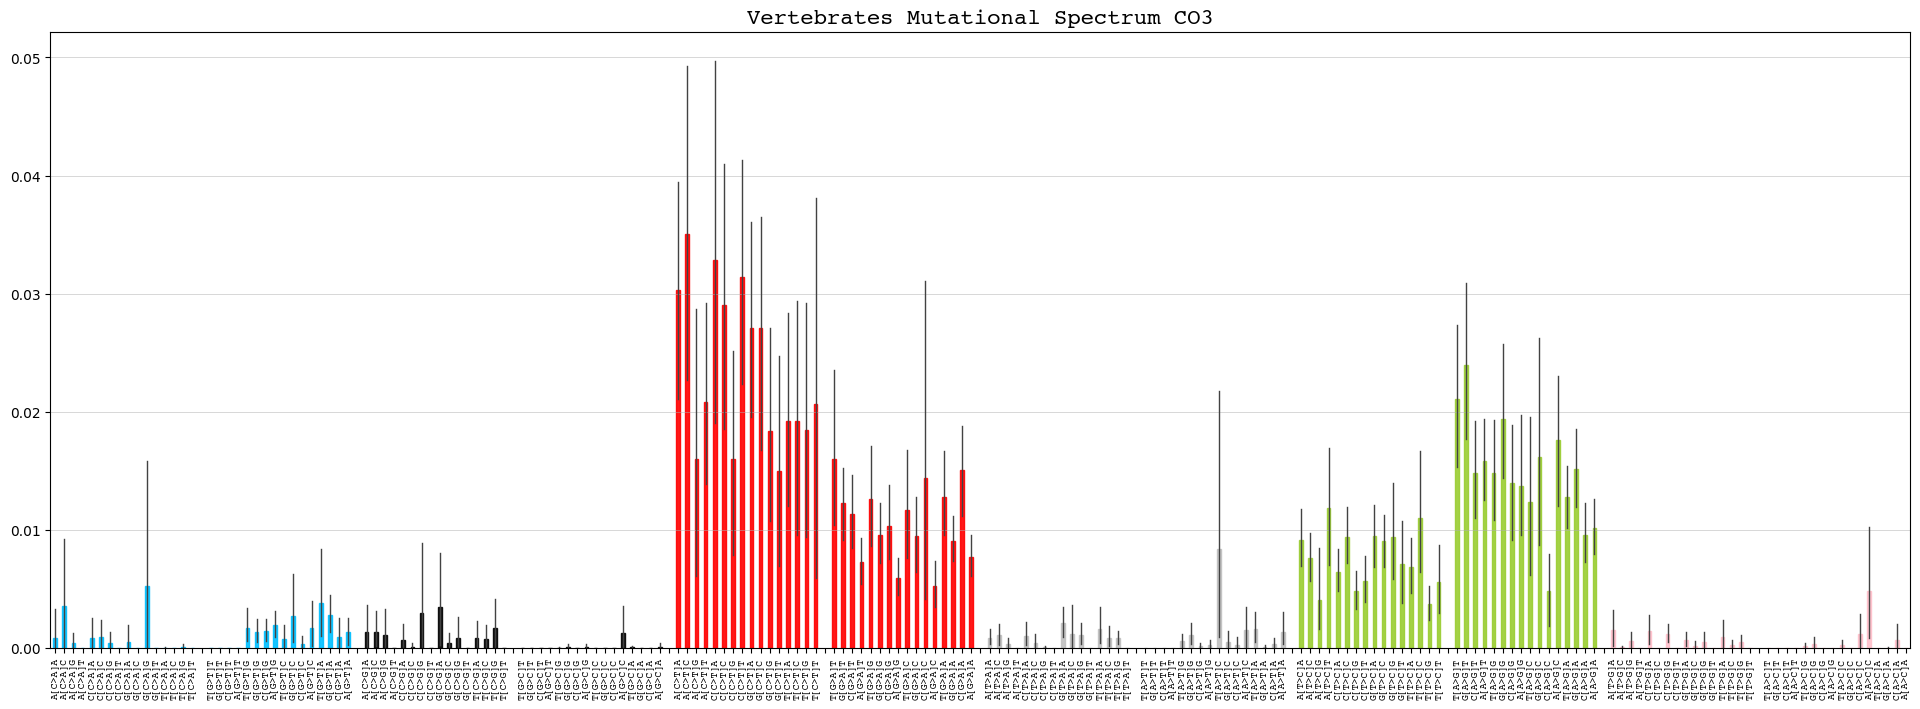

In [44]:
for gene in mutspecs_all.Gene.drop_duplicates():
    plot_mutspec192(mutspecs_all[mutspecs_all.Gene == gene], title=f'Vertebrates Mutational Spectrum {gene}', savepath=f'./figures/MutSpec192Vert{gene}.pdf',
                    fontname='Courier', ticksize=7)

# Work with Cancer Data

### Cancer Data preparation

In [45]:
from pymutspec.constants import possible_sbs192_set

canc_df = pd.read_csv('../1data_derivation/cancer/human_cancer_spectra_patient_specific_syn.csv') ### path to cancer data only with syn subs (TODO: PATH to cancer data)
canc_df = canc_df.drop(['nobs'], axis=1)

for sbs in possible_sbs192_set:
    if sbs not in canc_df.columns:
        canc_df[sbs] = 0

canc_df = canc_df.melt(id_vars=['sample'], value_vars=canc_df.columns[1:])\
    .sort_values(by=['sample']).reset_index(drop=True)
canc_df = canc_df.rename(columns={'variable': 'Mut', 'value': 'MutSpec'})
canc_df['Class'] = 'Cancer'
canc_df['Mut'] = canc_df.Mut.apply(getrevers) ### TO HEAVY CHAIN, initial data has light chain notation
canc_df['MutBase'] = canc_df['Mut'].str.get(2) + '>' + canc_df['Mut'].str.get(4)
canc_df.head()


/var/folders/zp/hykk29rd2lndslkkjgkzfb640000gn/T/ipykernel_11479/2856870710.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  canc_df[sbs] = 0


,sample,Mut,MutSpec,Class,MutBase
0,0007_CRUK_PC_0007,T[T>C]T,0.0,Cancer,T>C
1,0007_CRUK_PC_0007,C[A>T]G,0.0,Cancer,A>T
2,0007_CRUK_PC_0007,C[T>A]C,0.0,Cancer,T>A
3,0007_CRUK_PC_0007,A[T>C]C,0.0,Cancer,T>C
4,0007_CRUK_PC_0007,C[G>C]C,0.0,Cancer,G>C


In [49]:
### Chain check
### Most prevalent subs is C>T it's mean we are on heavy chain
canc_df.groupby('MutBase').MutSpec.mean().reset_index().sort_values(by='MutSpec', ascending=False).T

,5,1,6,10,4,8,0,9,11,7,2,3
MutBase,C>T,A>G,G>A,T>C,C>G,G>T,A>C,T>A,T>G,G>C,A>T,C>A
MutSpec,0.002349,0.000667,0.000173,0.000116,0.000049,0.000035,0.000025,0.000024,0.000018,0.000006,0.000001,0.0


In [50]:
### Mean for all cancer data
canc_df_draw = canc_df.groupby('Mut').MutSpec.mean().reset_index()
canc_df_draw.head()

,Mut,MutSpec
0,A[A>C]A,0.000000
1,A[A>C]C,0.000000
2,A[A>C]G,0.000000
3,A[A>C]T,0.000000
4,A[A>G]A,0.000343


### 192-comp mutational spectrum for cancer data

savepath = ./figures/MutSpec192Cancers.pdf


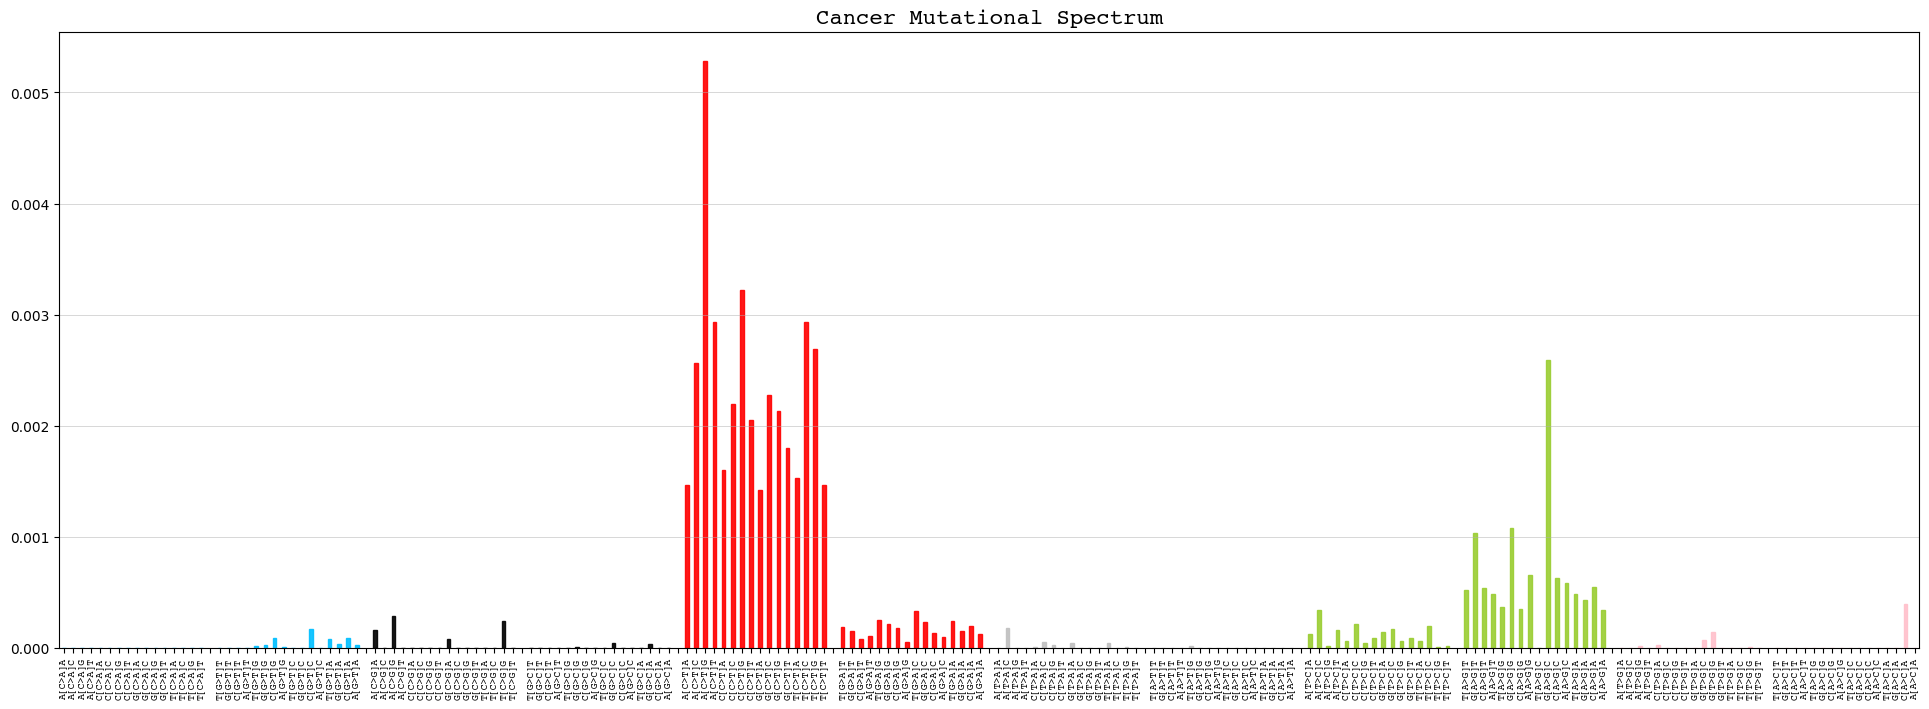

<AxesSubplot:title={'center':'Cancer Mutational Spectrum'}>

In [52]:
# all mutations excluding control region
plot_mutspec192(canc_df_draw, title='Cancer Mutational Spectrum', 
                filepath='./figures/MutSpec192Cancers.pdf',
                fontname='Courier', ticksize=7)

### Draw Ch>Th and Ah>Gh subs for cancer data

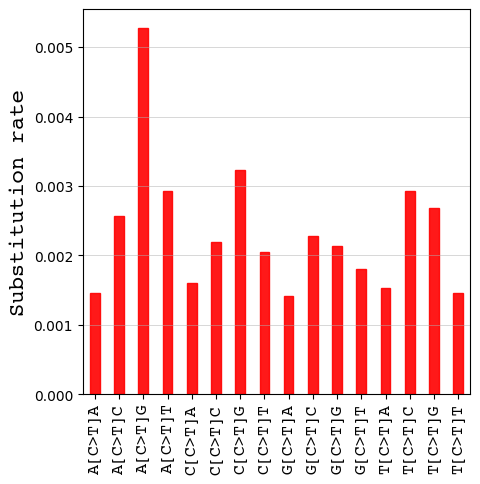

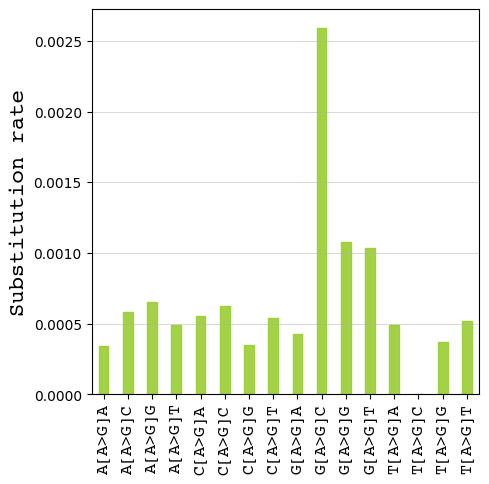

<AxesSubplot:ylabel='Substitution rate'>

In [53]:
plot_mutspec192(canc_df_draw, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5), savepath="./figures/CancerChTh.pdf")
plot_mutspec192(canc_df_draw, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5), savepath="./figures/CancerAhGh.pdf")

DIMA TODO: choose make this table or not

### Make table of mean spectra for all classes and human cancer


In [ ]:
mutspecs = pd.read_csv('../1data/new_dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Gene == 'Cytb']
mutspecs = mutspecs.fillna(0)
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers) ### change to heavy chain !!!
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


In [ ]:
mut_mn_cl = mutspecs.groupby(['Class', 'Mut']).MutSpec.mean().reset_index()
mut_mn_cl.head()

,Class,Mut,MutSpec
0,Actinopteri,A[A>C]A,0.000066
1,Actinopteri,A[A>C]C,0.001479
2,Actinopteri,A[A>C]G,0.000500
3,Actinopteri,A[A>C]T,0.000000
4,Actinopteri,A[A>G]A,0.006480


In [ ]:
canc_df_draw['Class'] = 'Human Cancer'
canc_df_draw

,Mut,MutSpec,Class
0,A[A>C]A,0.000000,Human Cancer
1,A[A>C]C,0.000000,Human Cancer
2,A[A>C]G,0.000000,Human Cancer
3,A[A>C]T,0.000000,Human Cancer
4,A[A>G]A,0.000343,Human Cancer
...,...,...,...
187,T[T>C]T,0.000019,Human Cancer
188,T[T>G]A,0.000000,Human Cancer
189,T[T>G]C,0.000000,Human Cancer
190,T[T>G]G,0.000015,Human Cancer


In [ ]:
final_mean_mutspec = pd.concat([mut_mn_cl, canc_df_draw])
final_mean_mutspec = final_mean_mutspec.pivot(index='Mut', columns='Class', values='MutSpec').reset_index()
final_mean_mutspec

Class,Mut,Actinopteri,Amphibia,Aves,Human Cancer,Lepidosauria,Mammalia
0,A[A>C]A,0.000066,0.000000,0.000000,0.000000,0.000023,0.000000
1,A[A>C]C,0.001479,0.000273,0.000000,0.000000,0.001169,0.000783
2,A[A>C]G,0.000500,0.000506,0.000051,0.000000,0.000357,0.000064
3,A[A>C]T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A[A>G]A,0.006480,0.007508,0.016672,0.000343,0.008653,0.011381
...,...,...,...,...,...,...,...
187,T[T>C]T,0.006858,0.004141,0.003578,0.000019,0.002366,0.003399
188,T[T>G]A,0.000458,0.000355,0.000364,0.000000,0.000393,0.000375
189,T[T>G]C,0.000397,0.000000,0.000000,0.000000,0.000233,0.000394
190,T[T>G]G,0.000828,0.001295,0.000183,0.000015,0.000728,0.000538


In [ ]:
final_mean_mutspec.to_csv('../data/MeanMutSpecAll.csv', index=False, sep=';')